# Day 08. Exercise 03
# Overfitting

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

plt.style.use('seaborn-v0_8')

## 1. Preprocessing

1. Read the file `dayofweek.csv` to a dataframe.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`.
3. Using, for example, `value_counts()` to check if the distribution of classes is similar in train and test.
4. Use the additional parameter `stratify=` and check the distribution again, now it should be more or less similar in both datasets.

In [2]:
df = pd.read_csv('../data/dayofweek.csv')

In [3]:
X = df.drop('dayofweek', axis=1)
y = df['dayofweek']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [5]:
print("Original Distribution:")
print(y.value_counts(normalize=True))

Original Distribution:
dayofweek
3    0.234875
6    0.211151
1    0.162515
5    0.160735
2    0.088375
0    0.080664
4    0.061684
Name: proportion, dtype: float64


In [6]:
print("\nTrain Distribution:")
print(y_train.value_counts(normalize=True))


Train Distribution:
dayofweek
3    0.234421
6    0.211424
1    0.162463
5    0.160979
2    0.088279
0    0.080861
4    0.061573
Name: proportion, dtype: float64


In [7]:
print("\nTest Distribution:")
print(y_test.value_counts(normalize=True))


Test Distribution:
dayofweek
3    0.236686
6    0.210059
1    0.162722
5    0.159763
2    0.088757
0    0.079882
4    0.062130
Name: proportion, dtype: float64


## 2. Baseline models

1. Train exactly the same baseline models from the previous exercise and calculate the accuracies using the test dataset with stratification.
2. Did all the models show the similar values of the metric? Which one has the largest difference comparing the current exercise and the previous? Put the answer to the markdown cell in the end of the section.

### a. Logreg

In [8]:
logreg = LogisticRegression(random_state=21, fit_intercept=False, max_iter=1000)
logreg.fit(X_train, y_train)
acc = accuracy_score(y_test, logreg.predict(X_test))
print(f"LogReg Test Accuracy: {acc:.2f}")

LogReg Test Accuracy: 0.63


### b. SVM

In [9]:
svc = SVC(kernel='linear', probability=True, random_state=21)
svc.fit(X_train, y_train)
acc = accuracy_score(y_test, svc.predict(X_test))
print(f"SVC Test Accuracy: {acc:.2f}")

SVC Test Accuracy: 0.72


### c. Decision tree

In [10]:
tree = DecisionTreeClassifier(max_depth=4, random_state=21)
tree.fit(X_train, y_train)
acc = accuracy_score(y_test, tree.predict(X_test))
print(f"Tree Test Accuracy: {acc:.2f}")

Tree Test Accuracy: 0.53


### d. Random forest

In [11]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf.fit(X_train, y_train)
acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Random Forest Test Accuracy: {acc:.2f}")

Random Forest Test Accuracy: 0.93


No, the models did not show similar values. The **Random Forest** classifier performed significantly better than the others (Accuracy: 0.93), while the Decision Tree performed the worst (Accuracy: 0.53).

The **Random Forest** model has the largest difference compared to the previous exercise. In Exercise 02, it achieved a perfect accuracy of **1.00** (because it memorized the training data), but on the test set, it dropped to **0.93**. This drop perfectly illustrates the concept of **overfitting**, while the other models (like Logistic Regression and Decision Tree) remained stable with very similar scores to the previous exercise.

## 3. Crossvalidation

We could play with parameters of the model trying to achive a better accuracy on the test dataset, but it is a bad practice. It leads us again to overfitting. Test dataset is only for checking quality of a final model.

But there is another way of solving the problem – crossvalidation. It does not use test dataset, but creates one more split of train dataset. Again, there are different ways of doing it, but the common thing is that there is a validation dataset that is used for hyperparameters optimization.

1. Using `cross_val_score` with `cv=10` calculate the mean accuracy and standard deviation for every model that you used before (logreg with `solver='liblinear'`, SVC, decision tree, random forest).

### a. Logreg

In [12]:
scores = cross_val_score(logreg, X, y, cv=10)
print(f"LogReg CV: Mean={scores.mean():.2f}, Std={scores.std():.2f}")

LogReg CV: Mean=0.45, Std=0.16


### b. SVM

In [13]:
scores = cross_val_score(svc, X, y, cv=10)
print(f"SVC CV: Mean={scores.mean():.2f}, Std={scores.std():.2f}")

SVC CV: Mean=0.51, Std=0.16


### c. Decision tree

In [14]:
scores = cross_val_score(tree, X, y, cv=10)
print(f"Tree CV: Mean={scores.mean():.2f}, Std={scores.std():.2f}")

Tree CV: Mean=0.39, Std=0.12


### d. Random forest

In [15]:
scores = cross_val_score(rf, X, y, cv=10)
print(f"RF CV: Mean={scores.mean():.2f}, Std={scores.std():.2f}")

RF CV: Mean=0.66, Std=0.17


## 4. Optimization

1. Choose the best model and play a little bit with the parameters on cross-validation, find a good enough parameter or a combination of the parameters.
2. Calculate the accuracy for the final model on the test dataset.
3. Draw a plot that displays the top-10 most  important features for that model.
4. Save the model using `joblib`.
5. Load the model, make predictions for the test dataset and calculate the accuracy.

In [16]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [17]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=21),
    param_grid,
    cv=5,
    n_jobs=-1
)

In [18]:
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=21),
    param_grid,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best Params: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.2f}")

Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.90


In [19]:
best_model = grid_search.best_estimator_
final_acc = accuracy_score(y_test, best_model.predict(X_test))
print(f"Final Test Accuracy: {final_acc:.2f}")

Final Test Accuracy: 0.93


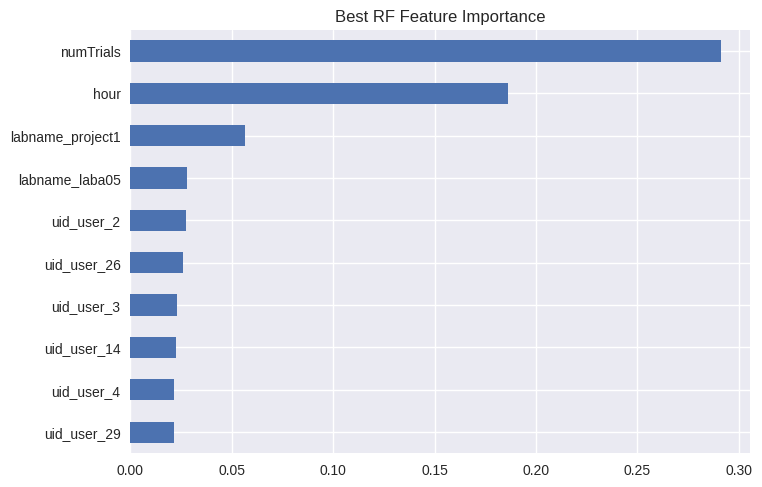

In [20]:
importances = best_model.feature_importances_

feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh')
plt.title('Best RF Feature Importance')
plt.show()

In [21]:
joblib.dump(best_model, '../data/best_model.pkl')
print("Model saved!")

Model saved!
